## Inverse Kinematics
### w/o Movement

In [1]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math as m
from mpl_toolkits.mplot3d import axes3d

In [12]:
# Length L1 ~ L3 값을 설정하세요.
L1 = 4
L2 = 3
L3 = 2
LMT = L1 + L2 + L3 +1

# end effetor의 방향과 위치를 설정
phi = 90/180 * np.pi
px = 3
py = 5

In [13]:
T0H = np.mat([[np.cos(phi), -np.sin(phi), 0, px],
             [np.sin(phi), np.cos(phi), 0, py],
             [0, 0, 1, 0], 
             [0, 0, 0, 1]])

In [14]:
# ---- Inverse Kinematics ----

T3H = np.mat([[1, 0, 0, L3],
            [0, 1, 0, 0],
            [0, 0, 1, 0], 
            [0, 0, 0, 1]])

T03 = T0H * np.linalg.inv(T3H)

x = T03[0, 3]
y = T03[1, 3]
c_phi = T03[0, 0]
s_phi = T03[1, 0]

c2 = (x**2 + y**2 - L1**2 - L2**2) / (2 * L1 * L2)

In [15]:
# s2 > 0
s2 = m.sqrt(1-c2**2)

th2 = m.atan2(s2, c2)

k1 = L1 + L2 * c2
k2 = L2 * s2

K = np.mat([[k1, -k2], [k2, k1]])
XY = np.mat([[x], [y]])

tmp=K.I*XY

c1 = tmp[0, 0]
s1 = tmp[1, 0]

th1 = m.atan2(s1, c1)

phi = m.atan2(s_phi, c_phi)
th3 = phi - th1 - th2

th1_deg = th1 * 180/np.pi
th2_deg = th2 * 180/np.pi
th3_deg = th3 * 180/np.pi
phi_deg = phi * 180/np.pi

In [16]:
# ---- Forward Kinematics ----

T01 = np.mat([[np.cos(th1), -np.sin(th1), 0, 0],
            [np.sin(th1), np.cos(th1), 0, 0],
            [0, 0, 1, 0], 
            [0, 0, 0, 1]])

T12 = np.mat([[np.cos(th2), -np.sin(th2), 0, L1],
            [np.sin(th2), np.cos(th2), 1, 0],
            [0, 0, 0, 0],
            [0, 0, 0, 1]])

T23 = np.mat([[np.cos(th3), -np.sin(th3), 0, L2],
            [np.sin(th3), np.cos(th3), 0, 0],
            [0, 0, 1, 0], 
            [0, 0, 0, 1]])

T3H = np.mat([[1, 0, 0, L3],
            [0, 1, 0, 0],
            [0, 0, 1, 0], 
            [0, 0, 0, 1]])

T02 = T01 * T12
T03 = T02 * T23
T0H = T03 * T3H


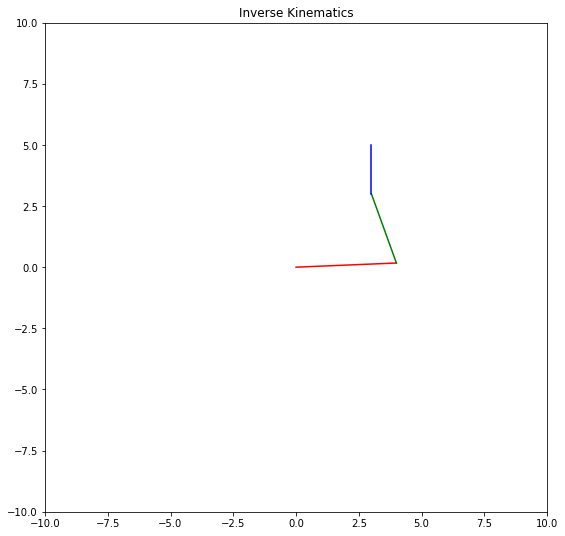

In [17]:
plt.figure(figsize = (L1+L2+L3,L1+L2+L3))
plt.xlim(-LMT, LMT)
plt.ylim(-LMT, LMT)
plt.plot([T01[0, 3], T02[0, 3]], [T01[1, 3], T02[1, 3]], 'r')
plt.plot([T02[0, 3], T03[0, 3]], [T02[1, 3], T03[1, 3]], 'g')
plt.plot([T03[0, 3], T0H[0, 3]], [T03[1, 3], T0H[1, 3]], 'b')
plt.title("Inverse Kinematics")
plt.show()

In [2]:
import numpy as np
np.sin(2* np.pi)

-2.4492935982947064e-16

In [3]:
90/180*np.pi

1.5707963267948966

In [5]:
np.sin(90/180*np.pi)

1.0